In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random long lat combinations
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#unpack zip into list
coordinates = list(lat_lngs)

In [4]:
# use print function to display the lat and long combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-85.25692445861296 65.01109318118216
-77.43383926503226 41.35499751717407
-69.7167356978393 -68.67028127985489
89.06480774588556 -20.997886302649164
88.41765217012218 61.598953864203736
-74.92974255386292 0.4076925805809992
50.776115970471295 -57.641372376213326
24.95561450931973 -55.56105538390191
30.83029655615411 30.25432507773941
23.593505930216864 52.2946833129231
-66.64800668431985 -71.25808399385987
24.228135946646873 -52.75513150470013
0.4566591573043155 -15.707389417463773
-28.477578931803286 -63.2907422112542
1.9364792796598778 18.67220619199496
-8.148105890288122 23.10921929207103
17.512644444982556 -37.03586259684621
83.48379885590094 76.64198822312679
-87.89061298794891 54.002142467835796
69.25263989563052 -7.279159889251147
59.43684995885366 61.32639261494339
86.94132293487795 48.31533154386025
-59.73969793950944 43.837195224678055
-22.207768166687757 -2.324994998524545
-1.4793909511857635 -77.22853858900496
-10.997206600363384 34.81734678121262
12.08645400713992 56.37312

84.0435283740803 -20.598322064193297
-61.58734758379812 75.58435842432641
82.38364741585539 80.76561764695444
-88.7883437101242 -62.3614953362473
46.96390959125094 82.53640967650261
17.128265533895757 -88.41583922084453
35.719772972538365 0.03322135581946384
57.5389114899244 22.333444528585503
70.62443638027099 58.09392399920111
-83.10680950344671 76.90003413960639
25.999123500585895 63.161146803586746
84.09995950476764 -18.067428954823313
-38.24318462185316 -46.63805616442955
7.285717634831187 87.04378754716907
60.6398250339345 21.924495710399626
4.457723667334065 -16.631036548660703
-16.11590640495119 40.2373062127927
-24.793278257572155 69.3855684915801
-53.4793519264436 -41.52910508736407
55.69695885104346 47.16945103432627
71.00764873933474 53.052374567406645
59.608457655363026 75.80587102700778
65.97336477351837 -89.8238172830461
41.493317164669804 -43.78439560769495
-29.76134821066249 70.06354164110732
20.473467356482118 -9.858254514795178
25.97863210341407 -74.99641014306917
-5

In [5]:
#import citipy
from citipy import citipy


In [6]:
# create list to hold cities closest to coordinates
cities = []

# identify nearest city to lat long combos
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is unique then add to list
    if city not in cities:
        cities.append(city)

#print city count
len(cities)

617

In [7]:
#import requests library
import requests

#import API key
from config import weatherAPI_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherAPI_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9eae8ae74d90e1ab199dc83caac75f4b


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
#create empty list to hold weather data
city_data = []

#print the start of logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#run api request for each city

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | saint-augustin
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | fowa
Processing Record 10 of Set 1 | doha
Processing Record 11 of Set 1 | monrovia
Processing Record 12 of Set 1 | santiago del estero
Processing Record 13 of Set 1 | impfondo
Processing Record 14 of Set 1 | mwene-ditu
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | sosva
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1

Processing Record 39 of Set 4 | carbonia
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | machico
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | west lorne
Processing Record 44 of Set 4 | barcelos
Processing Record 45 of Set 4 | safwah
City not found. Skipping...
Processing Record 46 of Set 4 | kampene
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | mizdah
Processing Record 50 of Set 4 | sarakhs
Processing Record 1 of Set 5 | atasu
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | san juan de los morros
Processing Record 4 of Set 5 | buxar
Processing Record 5 of Set 5 | tchamba
Processing Record 6 of Set 5 | san miguel
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | tazovskiy
Processing Record 9 of Set 5 | kanye
Processing Record 10 of Set 5 | miramas
Processing Record 11 of Set 5 | caucel
Processing Record 12

Processing Record 29 of Set 8 | prestice
Processing Record 30 of Set 8 | hambantota
Processing Record 31 of Set 8 | viedma
Processing Record 32 of Set 8 | pavlohrad
Processing Record 33 of Set 8 | pyatnitskoye
Processing Record 34 of Set 8 | arlit
Processing Record 35 of Set 8 | jiddah
City not found. Skipping...
Processing Record 36 of Set 8 | marsa matruh
Processing Record 37 of Set 8 | sambava
Processing Record 38 of Set 8 | the valley
Processing Record 39 of Set 8 | itaituba
Processing Record 40 of Set 8 | agadir
Processing Record 41 of Set 8 | north plainfield
Processing Record 42 of Set 8 | viligili
City not found. Skipping...
Processing Record 43 of Set 8 | oranjestad
Processing Record 44 of Set 8 | raudeberg
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | pueblo nuevo
Processing Record 47 of Set 8 | kismayo
Processing Record 48 of Set 8 | quatre cocos
Processing Record 49 of Set 8 | orodara
Processing Record 50 of Set 8 | beisfjord
Processing Record 1 of S

Processing Record 15 of Set 12 | stantsionno-oyashinskiy
Processing Record 16 of Set 12 | bathsheba
Processing Record 17 of Set 12 | alnavar
Processing Record 18 of Set 12 | nuuk
Processing Record 19 of Set 12 | maragogi
Processing Record 20 of Set 12 | riyadh
Processing Record 21 of Set 12 | tambura
Processing Record 22 of Set 12 | ahvaz
Processing Record 23 of Set 12 | soubre
Processing Record 24 of Set 12 | artyshta
Processing Record 25 of Set 12 | calvinia
Processing Record 26 of Set 12 | omboue
Processing Record 27 of Set 12 | isla mujeres
Processing Record 28 of Set 12 | kanel
Processing Record 29 of Set 12 | kashan
Processing Record 30 of Set 12 | bukan
Processing Record 31 of Set 12 | yining
Processing Record 32 of Set 12 | kang
Processing Record 33 of Set 12 | sharjah
Processing Record 34 of Set 12 | olden
Processing Record 35 of Set 12 | lithakia
Processing Record 36 of Set 12 | ormara
Processing Record 37 of Set 12 | chabahar
Processing Record 38 of Set 12 | sozimskiy
Proces

In [11]:
#convert array to panda df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,100,ZA,2022-10-11 00:15:14,86,-33.5906,26.8910,67.17,3.00
1,Ushuaia,40,AR,2022-10-11 00:15:14,61,-54.8000,-68.3000,42.46,14.97
2,Hermanus,99,ZA,2022-10-11 00:15:15,52,-34.4187,19.2345,69.13,7.16
3,Saint-Augustin,98,CA,2022-10-11 00:13:34,57,51.2260,-58.6502,40.87,11.52
4,Codrington,90,AU,2022-10-11 00:15:16,65,-38.2667,141.9667,62.17,13.96
5,Fowa,51,NG,2022-10-11 00:15:16,94,8.9167,6.4000,73.40,1.66
6,Doha,0,QA,2022-10-11 00:15:05,70,25.2867,51.5333,84.18,4.61
7,Monrovia,67,LR,2022-10-11 00:15:17,87,6.3005,-10.7969,77.31,7.27
8,Santiago Del Estero,25,AR,2022-10-11 00:15:18,26,-27.7951,-64.2615,63.97,8.25
9,Impfondo,99,CG,2022-10-11 00:15:20,96,1.6381,18.0667,70.70,2.08


In [12]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_d_df = city_data_df[column_order]

In [14]:
city_d_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-10-11 00:15:14,-33.5906,26.8910,67.17,86,100,3.00
1,Ushuaia,AR,2022-10-11 00:15:14,-54.8000,-68.3000,42.46,61,40,14.97
2,Hermanus,ZA,2022-10-11 00:15:15,-34.4187,19.2345,69.13,52,99,7.16
3,Saint-Augustin,CA,2022-10-11 00:13:34,51.2260,-58.6502,40.87,57,98,11.52
4,Codrington,AU,2022-10-11 00:15:16,-38.2667,141.9667,62.17,65,90,13.96
5,Fowa,NG,2022-10-11 00:15:16,8.9167,6.4000,73.40,94,51,1.66
6,Doha,QA,2022-10-11 00:15:05,25.2867,51.5333,84.18,70,0,4.61
7,Monrovia,LR,2022-10-11 00:15:17,6.3005,-10.7969,77.31,87,67,7.27
8,Santiago Del Estero,AR,2022-10-11 00:15:18,-27.7951,-64.2615,63.97,26,25,8.25
9,Impfondo,CG,2022-10-11 00:15:20,1.6381,18.0667,70.70,96,99,2.08


In [15]:
#output csv file
output_data_file = "weather_data/cities.csv"
#export city data to csv
city_d_df.to_csv(output_data_file, index_label="City_ID")


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_d_df["Lat"]
max_temps = city_d_df["Max Temp"]
humidity = city_d_df["Humidity"]
cloudiness = city_d_df["Cloudiness"]
wind_speed = city_d_df["Wind Speed"]

In [17]:
#import time module
import time
#get todays date in seconds
today = time.time()
today

1665525385.5600195

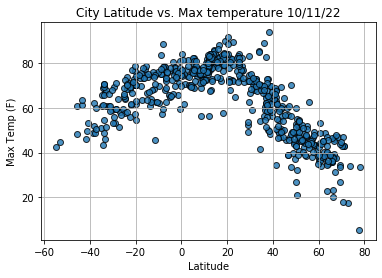

In [18]:
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Max temperature " + time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

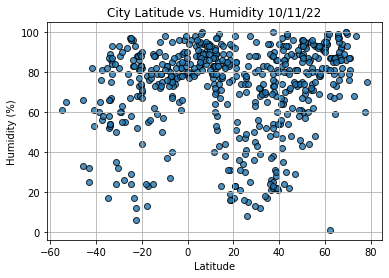

In [19]:
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

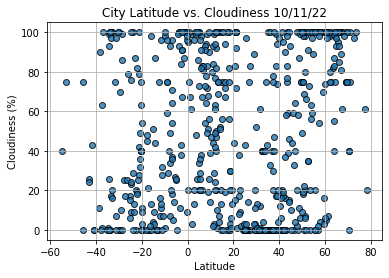

In [20]:
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

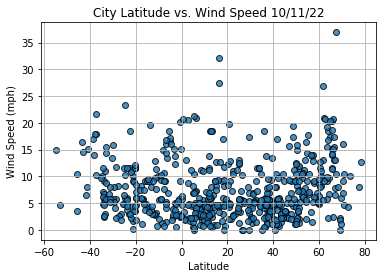

In [21]:
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()